# <center>AtliQ Hotels Data Analysis Project</center>
<center>Code Basics: Python For Beginner and Intermediate Learners</center>

In [1]:
# Import required libraries and datasets
import pandas as pd
df_bookings = pd.read_csv("fact_bookings.csv")
df_aggregated_bookings = pd.read_csv("fact_aggregated_bookings.csv")
df_date = pd.read_csv("dim_date.csv")
df_hotels = pd.read_csv("dim_hotels.csv")
df_rooms = pd.read_csv("dim_rooms.csv")


### Exploratory data analysis

In [2]:
df_bookings.head()
df_hotels.head()
# df_rooms.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [3]:
df_bookings.shape

(134590, 12)

In [4]:
df_bookings.dtypes

booking_id            object
property_id            int64
booking_date          object
check_in_date         object
checkout_date         object
no_guests            float64
room_category         object
booking_platform      object
ratings_given        float64
booking_status        object
revenue_generated      int64
revenue_realized       int64
dtype: object

In [5]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [6]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


## Checking the consistency of the categorical variables 

In [7]:
df_bookings["room_category"].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [8]:
assert list(df_bookings["room_category"].unique()) == list(df_rooms['room_id'])

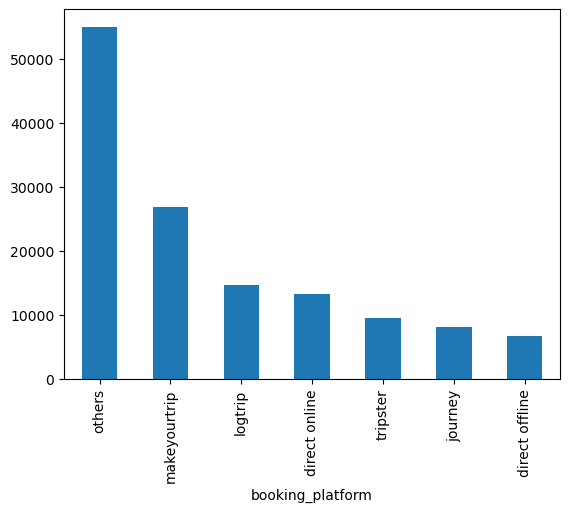

In [9]:
df_bookings['booking_platform'].value_counts().plot(kind="bar");

In [10]:
df_bookings["booking_platform"].unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [11]:
df_bookings["booking_status"].unique()

array(['Checked Out', 'Cancelled', 'No Show'], dtype=object)

## Data Cleaning

#### 1. Check for missing values in df_bookings

In [12]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

#### Only ratings_given column has missing values which is reasonable as not all customers will give ratings

#### 2. Check for missing values in df_aggregated_bookings 

In [13]:
df_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [14]:
df_aggregated_bookings[df_aggregated_bookings["capacity"].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [15]:
df_aggregated_bookings["capacity"].mean(), df_aggregated_bookings["capacity"].median()

(25.280495759947815, 25.0)

#### Replace null values with the median value

In [16]:
df_aggregated_bookings["capacity"] = df_aggregated_bookings["capacity"].fillna(df_aggregated_bookings["capacity"].median())

In [17]:
#Confirm missing values has been replaced with the median value
df_aggregated_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


In [18]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


#### 3. Number of guests cannot be zero as min(no_guests) as shown. The negative values under this column should be investigated and dropped

In [19]:
df_bookings[df_bookings['no_guests'] < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [20]:
df_bookings = df_bookings[df_bookings['no_guests'] > 0].reset_index(drop=True)
df_bookings.shape

(134578, 12)

#### 4. Removal of outlier removal in "revenue_generated" column

In [21]:
# Maximum amount seems unreasonable
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [22]:
# Check lower and upper limit with average +|- 3 standard variations
average, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [23]:
upper_limit = average + 3*std
loweer_limit = average - 3*std
upper_limit, loweer_limit # Revenue cannot be negative so we use lower limit as greater than 0

(294498.50173198653, -263742.4278566132)

In [24]:
df_bookings[df_bookings.revenue_generated <= 0] # Lower limit check ok

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [25]:
df_bookings[df_bookings.revenue_generated > upper_limit] # Values greater than upper limit

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
106,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
310,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
557,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129165,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [26]:
# Dropping values greater than upper limitdf_bookings = df_bookings[df_bookings.revenue_generated <= upper_limit]
df_bookings = df_bookings[df_bookings["revenue_generated"] <= upper_limit]
df_bookings.shape

(134573, 12)

In [27]:
df_bookings.revenue_generated.describe()



count    134573.000000
mean      14915.959776
std        6452.676164
min        6500.000000
25%        9900.000000
50%       13500.000000
75%       18000.000000
max       45220.000000
Name: revenue_generated, dtype: float64

In [28]:
# Recheck upper limits after removing outliers
average, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
upper_limit = average + 3*std
upper_limit

34273.988269479276

In [29]:
# Check data with new upper limit
df_bookings[df_bookings.revenue_generated > upper_limit] # Investigate further

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
132,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
134,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
138,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
144,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
148,May012216559RT417,16559,30-04-22,1/5/2022,2/5/2022,4.0,RT4,others,NaN,Cancelled,38760,15504
...,...,...,...,...,...,...,...,...,...,...,...,...
134320,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134456,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134458,Jul312219562RT47,19562,10/7/2022,31-07-22,6/8/2022,5.0,RT4,makeyourtrip,NaN,Cancelled,37050,14820
134463,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [30]:
df_bookings[df_bookings.revenue_generated > upper_limit]["room_category"].value_counts() 


room_category
RT4    1519
Name: count, dtype: int64

#### Probing result revealed all new outliers are RT4 (presidential suit). Room type is of luxurious category which may validate having values above upper limit, further investigation of RT4 may be necessary.

In [31]:
# Further analysis of RT4
df_bookings_RT4 = df_bookings[df_bookings["room_category"] == "RT4"]
df_bookings_RT4["revenue_generated"].describe()

count    16071.000000
mean     27465.457034
std       6310.403418
min      19000.000000
25%      19000.000000
50%      28500.000000
75%      32300.000000
max      45220.000000
Name: revenue_generated, dtype: float64

In [32]:
average_RT4, std_RT4 = df_bookings_RT4["revenue_generated"].mean(), df_bookings_RT4["revenue_generated"].std()
average_RT4, std_RT4

(27465.457034409807, 6310.403418299734)

In [33]:
upper_limit_RT4 = average_RT4 + 3 * std_RT4
upper_limit_RT4

46396.66728930901

#### Upper limit is 46397 > 45220 (maximum), so, no more outliers

#### 5. Check where bookings are greater than capacity and drop them

In [34]:
df_aggregated_bookings[df_aggregated_bookings["successful_bookings"] > df_aggregated_bookings["capacity"]]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


## Data Transformation

#### 1. Create occupancy percentage column in df_aggregated_bookings

In [35]:
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [36]:
df_aggregated_bookings["percent_occupancy"] = round((df_aggregated_bookings["successful_bookings"]/df_aggregated_bookings["capacity"]) * 100, 2)
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,percent_occupancy
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


#### 2. Check where occupancy percentage is > 100%

In [37]:
df_aggregated_bookings[df_aggregated_bookings["percent_occupancy"] > 100]

,property_id,check_in_date,room_category,successful_bookings,capacity,percent_occupancy
3,17558,1-May-22,RT1,30,19.0,157.89
12,16563,1-May-22,RT1,100,41.0,243.90
4136,19558,11-Jun-22,RT2,50,39.0,128.21
6209,19560,2-Jul-22,RT1,123,26.0,473.08
8522,19559,25-Jul-22,RT1,35,24.0,145.83
9194,18563,31-Jul-22,RT4,20,18.0,111.11


#### These are likely errors and are dropped since they are only 6 rows

In [38]:
df_aggregated_bookings = df_aggregated_bookings[df_aggregated_bookings["percent_occupancy"] <= 100]
df_aggregated_bookings.shape

(9194, 6)

## 4. Insights from Data


### What is an average occupancy rate in each of the room categories?

In [39]:
df_aggregated_bookings.groupby("room_category")["percent_occupancy"].mean()
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [40]:
# Merging tables to answer insights: df_aggregated_bookings and df_rooms to df
df = pd.merge(df_aggregated_bookings, df_rooms,left_on="room_category", right_on="room_id")

df = df.drop('room_id', axis=1)
df.head()
df.groupby("room_class")["percent_occupancy"].mean()


room_class
Elite           58.009756
Premium         58.028213
Presidential    59.277925
Standard        57.889643
Name: percent_occupancy, dtype: float64

In [41]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,percent_occupancy,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard


In [42]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


### What is average occupancy rate per city

In [43]:
# Merging df with df_hotels to get df1
df1 = df.merge(df_hotels, on="property_id")
df1.head()


,property_id,check_in_date,room_category,successful_bookings,capacity,percent_occupancy,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai


In [44]:
df1.groupby('city')['percent_occupancy'].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.909181
Name: percent_occupancy, dtype: float64

### When was the occupancy better? Weekday or Weekend?

In [45]:

df1.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,percent_occupancy,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai


In [46]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [47]:
# Merging df1 with df_date to get df2
df2 = pd.merge(df1, df_date, left_on="check_in_date", right_on="date")
df2.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,percent_occupancy,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [48]:
df2.groupby('day_type')['percent_occupancy'].mean().round()

day_type
weekeday    51.0
weekend     72.0
Name: percent_occupancy, dtype: float64

#### Occupancy was better at weekend with average occupancy of 72%

## In the month of June, what is the occupancy for different cities

In [49]:
df2[df2['mmm yy'] == "Jun 22"].groupby('city')['percent_occupancy'].mean()

city
Bangalore    56.436143
Delhi        62.474286
Hyderabad    58.458075
Mumbai       58.382560
Name: percent_occupancy, dtype: float64

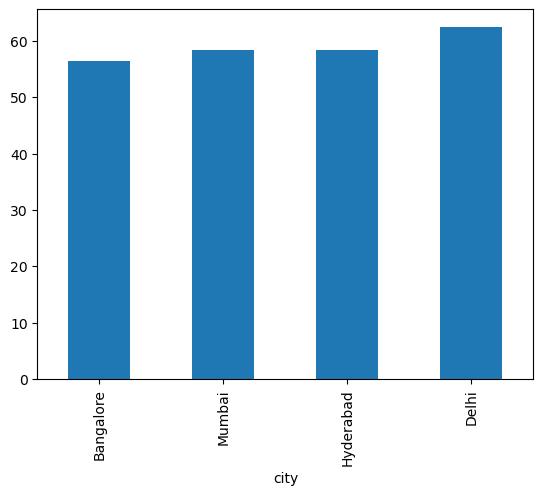

In [50]:
df2[df2['mmm yy'] == "Jun 22"].groupby('city')['percent_occupancy'].mean().sort_values().plot(kind='bar');